## Exercise 8.8 - Trajectory Sampling Experiment with $b = 3$

Replicate the experiment whose results are shown in the lower part of Figure 8.8, then try
the same experiment but with $b = 3$. Discuss the meaning of your results.

In [1]:
! pip3 -q install numpy matplotlib gym

In [2]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import branch
from sampling import uniform_sampling, trajectory_sampling

### Reproduction of Figure 8.8

In [3]:
def average_uniform_sampling(n, b, num_updates, num_averages):
    env = gym.make('BranchingStates-v0', n=n, b=b)
    history = 0
    for n in range(num_averages):
        env.seed(n)
        xy, hist = uniform_sampling(env, num_updates)
        history += (np.array(hist) - history) / (n + 1)
    return xy, history


def average_trajectory_sampling(n, b, num_updates, num_averages):
    env = gym.make('BranchingStates-v0', n=n, b=b)
    history = 0
    for n in range(num_averages):
        env.seed(n)
        xy, hist = trajectory_sampling(env, num_updates, eps=0.1)
        history += (np.array(hist) - history) / (n + 1)
    return xy, history

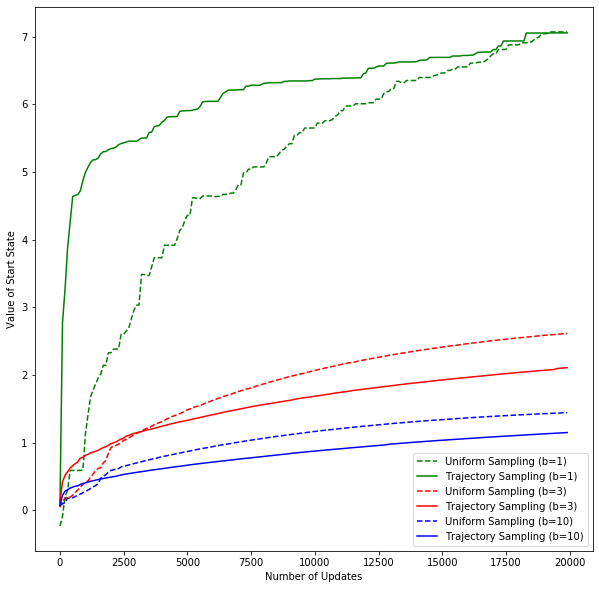

In [4]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
plt.figure()
plt.xlabel("Number of Updates")
plt.ylabel("Value of Start State")

n = 1_000
num_updates = 20_000
num_averages = 10

for b, color in zip([1, 3, 10], ['green', 'red', 'blue']):
    history = average_uniform_sampling(n, b, num_updates, num_averages)
    plt.plot(*history, '--', color=color, label=f'Uniform Sampling (b={b})')

    history = average_trajectory_sampling(n, b, num_updates, num_averages)
    plt.plot(*history, '-', color=color, label=f'Trajectory Sampling (b={b})')

plt.legend()

### Trajectory Sampling Experiment with 10,000 States and $b = 3$

In all cases, sampling according to the on-policy distribution resulted in faster planning
initially and retarded planning in the long run. The effect was stronger, and the initial
period of faster planning was longer, at smaller branching factors.

These effects also became stronger as the number of states increased. The figure shows results
for a branching factor of 1 and 3 for a task with 10,000 states. In this case the advantage was
longer lasting and permanent. Higher branching factor tends to reduce the advantage of on-policy
trajectory sampling in the long run.

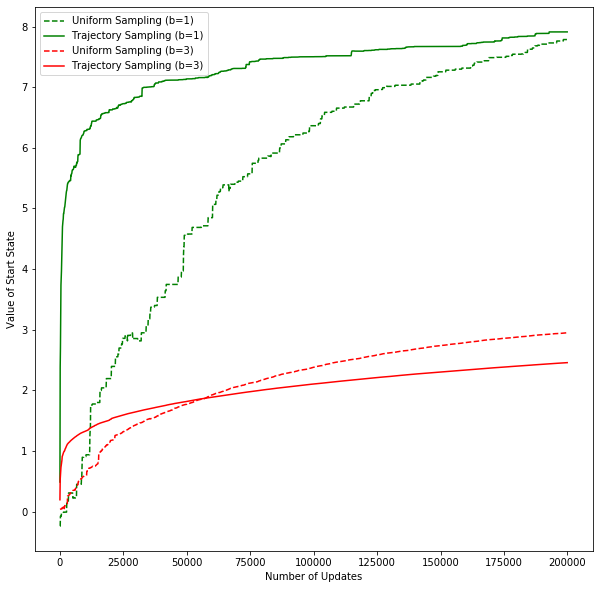

In [5]:
plt.figure()
plt.xlabel("Number of Updates")
plt.ylabel("Value of Start State")

n = 10_000
num_updates = 200_000
num_averages = 10

for b, color in zip([1, 3], ['green', 'red']):
    history = average_uniform_sampling(n, b, num_updates, num_averages)
    plt.plot(*history, '--', color=color, label=f'Uniform Sampling (b={b})')

    history = average_trajectory_sampling(n, b, num_updates, num_averages)
    plt.plot(*history, '-', color=color, label=f'Trajectory Sampling (b={b})')

plt.legend()